In [1]:
import spacy
import pickle
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from typing import List, Tuple, Dict
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence, pad_sequence

from typing import List, Tuple, Dict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import torch
from torch import nn, optim
from torch.nn import BCEWithLogitsLoss, CrossEntropyLoss

from torchtext.data.metrics import bleu_score

### constants ###

PARENT_DIR = '/content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/'
n_extra_tokens = 4
UNK_IDX = 0 
PADDING_IDX = 1 
BOS_IDX = 2
EOS_IDX = 3 

# !pip install spacy==3.1.1

# import spacy.cli
# spacy.cli.download("de_core_news_lg")
# spacy.cli.download("en_core_web_lg")

# source_nlp = spacy.load("de_core_news_lg")
# target_nlp = spacy.load("en_core_web_lg")

In [2]:
import torch
from google.colab import drive
drive.mount('/content/gdrive') # for google colab. adjust accordingly

print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

import sys  
sys.path.insert(0, PARENT_DIR)

Mounted at /content/gdrive
True
Tesla P100-PCIE-16GB
cuda


In [3]:
# from load_data import *

from EncoderLSTM import *
from DecoderLSTM import *
from Seq2Seq import *
from train import *

from load_data import load_pickled_dataloaders

# load small dataloaders batchsize = 1
mt_train_ds, mt_val_ds, mt_test_ds, mt_train_dl, mt_val_dl, mt_test_dl = load_pickled_dataloaders()
accum_iter = 32

# load small dataloaders batchsize = 32
# mt_train_ds, mt_val_ds, mt_test_ds, mt_train_dl, mt_val_dl, mt_test_dl = load_pickled_dataloaders(batch1 = False)
# accum_iter = 1

In [4]:
batch = next(iter(mt_train_dl))
len(batch), len(batch[1])

(4, 1)

In [5]:
len(mt_train_ds), len(mt_val_ds), len(mt_test_ds)

(20611, 89, 157)

# Set up dictionary to store all results

In [8]:
import time

In [9]:
times = {}

In [10]:
lr = 0.001
epochs = 20
hidden_size = 512

# Grid search for learning rate

In [ ]:
grid = [0.0005, 0.0001, 0.00005, 0.00001]
val_bleus = []

for lr in grid:
  encoder = EncoderLSTM(
    input_size = len(mt_train_ds.source_vocab), 
    hidden_size = hidden_size, 
    padding_idx = PADDING_IDX,
    device = device
  )
  model, losses, bleus, which = train(
      encoder,
      mt_train_ds, mt_train_dl, 
      mt_val_ds, mt_val_dl,
      device, 
      bos_idx = BOS_IDX, eos_idx = EOS_IDX,
      path = PARENT_DIR + 'jenna_lstm_models/',
      epochs = epochs, hidden_size = hidden_size,
      lr = lr, weight_decay = 1*10**(-4),
      accum_iter = accum_iter
  )
  val_bleus.append(bleus[which])
  print(lr, bleus[which])

In [ ]:
grid2 = [0.05, 0.001, 0.0008]
val_bleus2 = []

for lr in grid2:
  encoder = EncoderLSTM(
    input_size = len(mt_train_ds.source_vocab), 
    hidden_size = hidden_size, 
    padding_idx = PADDING_IDX,
    device = device
  )
  model, losses, bleus, which = train(
      encoder,
      mt_train_ds, mt_train_dl, 
      mt_val_ds, mt_val_dl,
      device, 
      bos_idx = BOS_IDX, eos_idx = EOS_IDX,
      path = PARENT_DIR + 'jenna_lstm_models/',
      epochs = epochs, hidden_size = hidden_size,
      lr = lr, weight_decay = 1*10**(-4),
      accum_iter = accum_iter
  )
  val_bleus2.append(bleus[which])
  print(lr, bleus[which])

# No Augmentation

directory already exists
/content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jenna_models/ contains ['epoch7', 'epoch0', 'epoch1', 'epoch2', 'epoch3', 'epoch4', 'epoch5', 'epoch6']
continuing anyways... some files may be overwritten


epoch 0: training loss = 5.07696 - validation loss = 4.85459 - validation bleu = 0.0102


epoch 1: training loss = 4.51731 - validation loss = 4.5861 - validation bleu = 0.03086


epoch 2: training loss = 4.26676 - validation loss = 4.45049 - validation bleu = 0.027


epoch 3: training loss = 4.08985 - validation loss = 4.293 - validation bleu = 0.03262


epoch 4: training loss = 3.95095 - validation loss = 4.2311 - validation bleu = 0.03821


epoch 5: training loss = 3.83629 - validation loss = 4.15797 - validation bleu = 0.04385


epoch 6: training loss = 3.74002 - validation loss = 4.10825 - validation bleu = 0.04328


epoch 7: training loss = 3.65465 - validation loss = 4.09266 - validation bleu = 0.04979


epoch 8: training loss = 3.57914 - validation loss = 4.05831 - validation bleu = 0.04386


epoch 9: training loss = 3.50933 - validation loss = 4.02162 - validation bleu = 0.04281


epoch 10: training loss = 3.44738 - validation loss = 4.02319 - validation bleu = 0.04804


epoch 11: training loss = 3.38975 - validation loss = 4.00763 - validation bleu = 0.04691


epoch 12: training loss = 3.33622 - validation loss = 4.001 - validation bleu = 0.05144


epoch 13: training loss = 3.28843 - validation loss = 3.98011 - validation bleu = 0.05496


epoch 14: training loss = 3.24385 - validation loss = 3.97956 - validation bleu = 0.05533


epoch 15: training loss = 3.19994 - validation loss = 3.96682 - validation bleu = 0.05423


epoch 16: training loss = 3.16133 - validation loss = 3.97586 - validation bleu = 0.04498


epoch 17: training loss = 3.12243 - validation loss = 3.96347 - validation bleu = 0.0538


epoch 18: training loss = 3.08626 - validation loss = 3.97686 - validation bleu = 0.05679


epoch 19: training loss = 3.05406 - validation loss = 3.96388 - validation bleu = 0.05437
best model path: /content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jenna_models/epoch18
CPU times: user 34min 32s, sys: 44.9 s, total: 35min 17s
Wall time: 35min 31s


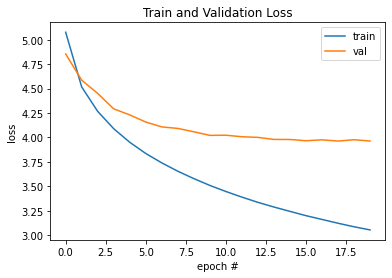

In [ ]:
# takes 40 minutes
%%time
start_time = time.time()
encoder = EncoderLSTM(
    input_size = len(mt_train_ds.source_vocab), 
    hidden_size = hidden_size, 
    padding_idx = PADDING_IDX,
    device = device
)
model, losses, bleus, which = train(
    encoder,
    mt_train_ds, mt_train_dl, 
    mt_val_ds, mt_val_dl,
    device, 
    bos_idx = BOS_IDX, eos_idx = EOS_IDX,
    path = PARENT_DIR + 'jennas_lstm_models_none/',
    epochs = epochs, hidden_size = hidden_size,
    lr = lr, weight_decay = 1e-4,
    accum_iter = accum_iter
)
times['none'] = time.time() - start_time

pd.DataFrame(losses).plot(xlabel='epoch #', ylabel='loss', title='Train and Validation Loss')

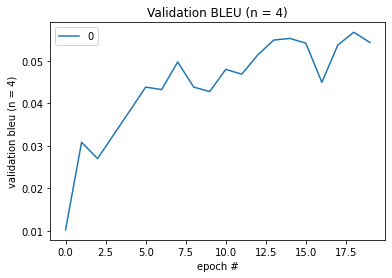

In [ ]:
pd.DataFrame(bleus).plot(xlabel='epoch #', ylabel='validation bleu (n = 4)', title='Validation BLEU (n = 4)')

In [ ]:
# model = torch.load(PARENT_DIR+"jennas_lstm_model")

In [ ]:
candidate_text, reference_text = translate_corpus(mt_train_ds.target_vocab, mt_test_dl, model, 
                                                  eos_idx = EOS_IDX, bos_idx = BOS_IDX,
                                                  padding_idx = PADDING_IDX)
bleu = bleu_score(candidate_text, reference_text)
bleu

0.050201352685689926

In [ ]:
bleu = bleu_score(candidate_text, reference_text, max_n = 1, weights = [1])
bleu

0.3209177255630493

In [ ]:
torch.save(model, PARENT_DIR+"jennas_lstm_model")

# Baseline: *Swap*

creating directory /content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_lstm_models_swap/


epoch 0: training loss = 5.07157 - validation loss = 4.85893 - validation bleu = 0.01165


epoch 1: training loss = 4.52136 - validation loss = 4.59552 - validation bleu = 0.01673


epoch 2: training loss = 4.28635 - validation loss = 4.44686 - validation bleu = 0.02836


epoch 3: training loss = 4.11355 - validation loss = 4.35367 - validation bleu = 0.03246


epoch 4: training loss = 3.97548 - validation loss = 4.2614 - validation bleu = 0.03574


epoch 5: training loss = 3.86409 - validation loss = 4.19333 - validation bleu = 0.03762


epoch 6: training loss = 3.76581 - validation loss = 4.15079 - validation bleu = 0.03396


epoch 7: training loss = 3.68146 - validation loss = 4.09287 - validation bleu = 0.04608


epoch 8: training loss = 3.60434 - validation loss = 4.08448 - validation bleu = 0.05161


epoch 9: training loss = 3.53693 - validation loss = 4.0411 - validation bleu = 0.04892


epoch 10: training loss = 3.47445 - validation loss = 4.01716 - validation bleu = 0.05863


epoch 11: training loss = 3.41664 - validation loss = 3.9912 - validation bleu = 0.05226


epoch 12: training loss = 3.36562 - validation loss = 3.99521 - validation bleu = 0.05215


epoch 13: training loss = 3.31797 - validation loss = 3.96046 - validation bleu = 0.05636


epoch 14: training loss = 3.27438 - validation loss = 3.94621 - validation bleu = 0.05602


epoch 15: training loss = 3.2316 - validation loss = 3.93834 - validation bleu = 0.06105


epoch 16: training loss = 3.19268 - validation loss = 3.94021 - validation bleu = 0.06393


epoch 17: training loss = 3.15613 - validation loss = 3.92034 - validation bleu = 0.06901


epoch 18: training loss = 3.12295 - validation loss = 3.93215 - validation bleu = 0.06099


epoch 19: training loss = 3.09082 - validation loss = 3.92019 - validation bleu = 0.06094
best model path: /content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_lstm_models_swap/epoch17
CPU times: user 37min 29s, sys: 48.6 s, total: 38min 18s
Wall time: 38min 40s


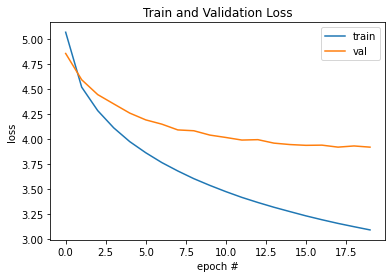

In [ ]:
%%time
start_time = time.time()

encoder_swap = EncoderLSTM(
    input_size = len(mt_train_ds.source_vocab), 
    hidden_size = hidden_size, 
    padding_idx = PADDING_IDX,
    device = device,
    augmentation_type = 'swap',
    gamma = 0.15, k = 3
)
model_swap, losses_swap, bleus_swap, which = train(
    encoder_swap,
    mt_train_ds, mt_train_dl, 
    mt_val_ds, mt_val_dl,
    device,  
    bos_idx = BOS_IDX, eos_idx = EOS_IDX,
    path = PARENT_DIR + 'jennas_lstm_models_swap/',
    epochs = epochs, hidden_size = hidden_size,
    lr = lr, weight_decay = 1e-4,
    accum_iter = accum_iter
)
times['swap'] = time.time() - start_time


pd.DataFrame(losses_swap).plot(xlabel='epoch #', ylabel='loss', 
                               title='Train and Validation Loss')

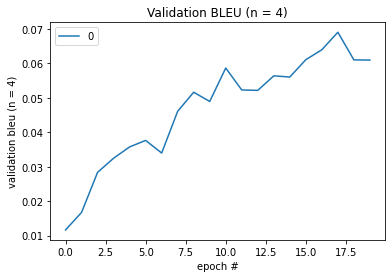

In [ ]:
pd.DataFrame(bleus_swap).plot(xlabel='epoch #', ylabel='validation bleu (n = 4)', title='Validation BLEU (n = 4)')

In [ ]:
# model_swap = torch.load("/content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_lstm_models_swap/epoch17")

In [ ]:
candidate_text, reference_text = translate_corpus(mt_train_ds.target_vocab, mt_test_dl, model_swap, 
                                                  eos_idx = EOS_IDX, bos_idx = BOS_IDX,
                                                  padding_idx = PADDING_IDX)
bleu_swap = bleu_score(candidate_text, reference_text)
bleu_swap

0.0539703294634819

In [ ]:
bleu_swap = bleu_score(candidate_text, reference_text, max_n = 1, weights = [1])
bleu_swap

0.3512917757034302

In [ ]:
with open(PARENT_DIR+'/jennas_model_swap.pickle', 'wb') as handle:
    pickle.dump(model_swap, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Baseline: Drop

creating directory /content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_lstm_models_drop/


epoch 0: training loss = 5.08214 - validation loss = 4.88758 - validation bleu = 0.01563


epoch 1: training loss = 4.5604 - validation loss = 4.63963 - validation bleu = 0.02325


epoch 2: training loss = 4.34245 - validation loss = 4.49255 - validation bleu = 0.0273


epoch 3: training loss = 4.18744 - validation loss = 4.40775 - validation bleu = 0.02584


epoch 4: training loss = 4.06453 - validation loss = 4.30401 - validation bleu = 0.03417


epoch 5: training loss = 3.96357 - validation loss = 4.24026 - validation bleu = 0.03826


epoch 6: training loss = 3.88045 - validation loss = 4.21468 - validation bleu = 0.03452


epoch 7: training loss = 3.8116 - validation loss = 4.1467 - validation bleu = 0.04801


epoch 8: training loss = 3.75329 - validation loss = 4.12443 - validation bleu = 0.04207


epoch 9: training loss = 3.69833 - validation loss = 4.10383 - validation bleu = 0.04144


epoch 10: training loss = 3.65107 - validation loss = 4.07669 - validation bleu = 0.04762


epoch 11: training loss = 3.60719 - validation loss = 4.03959 - validation bleu = 0.04543


epoch 12: training loss = 3.56698 - validation loss = 4.05885 - validation bleu = 0.04577


epoch 13: training loss = 3.52924 - validation loss = 4.03914 - validation bleu = 0.05527


epoch 14: training loss = 3.4966 - validation loss = 4.01958 - validation bleu = 0.04463


epoch 15: training loss = 3.46114 - validation loss = 4.01082 - validation bleu = 0.05311


epoch 16: training loss = 3.4307 - validation loss = 3.97628 - validation bleu = 0.05434


epoch 17: training loss = 3.39997 - validation loss = 3.98604 - validation bleu = 0.04875


epoch 18: training loss = 3.37427 - validation loss = 3.98104 - validation bleu = 0.05068


epoch 19: training loss = 3.34712 - validation loss = 3.9942 - validation bleu = 0.05127
best model path: /content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_lstm_models_drop/epoch13
CPU times: user 40min 16s, sys: 47.5 s, total: 41min 3s
Wall time: 41min 18s


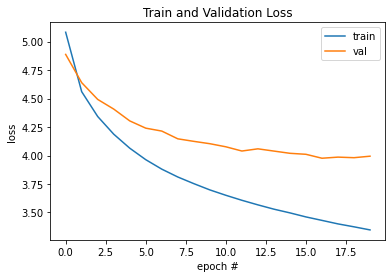

In [ ]:
%%time
start_time= time.time()
encoder_drop = EncoderLSTM(
    input_size = len(mt_train_ds.source_vocab), 
    hidden_size = hidden_size, 
    padding_idx = PADDING_IDX,
    device = device,
    augmentation_type = 'drop',
    gamma = 0.10
)
model_drop, losses_drop, bleus_drop, which = train(
    encoder_drop,
    mt_train_ds, mt_train_dl, 
    mt_val_ds, mt_val_dl, 
    device, 
    bos_idx = BOS_IDX, eos_idx = EOS_IDX,
    path = PARENT_DIR + 'jennas_lstm_models_drop/',
    epochs = epochs, hidden_size = hidden_size,
    lr = lr, weight_decay = 1e-4,
    accum_iter = accum_iter
)
times['drop'] = time.time() - start_time


pd.DataFrame(losses_drop).plot(xlabel='epoch #', ylabel='loss',
                               title='Train and Validation Loss')

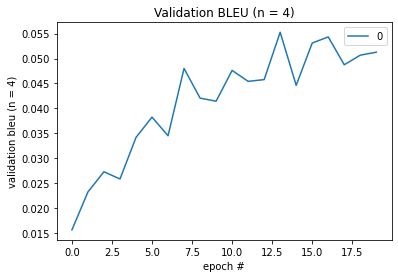

In [ ]:
pd.DataFrame(bleus_drop).plot(xlabel='epoch #', ylabel='validation bleu (n = 4)', title='Validation BLEU (n = 4)')

In [ ]:
# model_drop = torch.load('/content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_lstm_models_drop/epoch13')

In [ ]:
candidate_text, reference_text = translate_corpus(mt_train_ds.target_vocab, mt_test_dl, model_drop, 
                                                  eos_idx = EOS_IDX, bos_idx = BOS_IDX,
                                                  padding_idx = PADDING_IDX)
bleu_drop = bleu_score(candidate_text, reference_text)
bleu_drop

0.05708257108926773

In [ ]:
bleu_drop = bleu_score(candidate_text, reference_text, max_n = 1, weights = [1])
bleu_drop

0.336580753326416

In [ ]:
with open(PARENT_DIR+'/jennas_model_drop.pickle', 'wb') as handle:
    pickle.dump(model_drop, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Baseline: Blank/Placeholder

directory already exists
/content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_lstm_models_blank/ contains ['epoch0', 'epoch1', 'epoch2', 'epoch3', 'epoch4', 'epoch5', 'epoch6', 'epoch7', 'epoch8', 'epoch9', 'epoch10', 'epoch11', 'epoch12', 'epoch13', 'epoch14', 'epoch15', 'epoch16', 'epoch17', 'epoch18', 'epoch19']
continuing anyways... some files may be overwritten


epoch 0: training loss = 5.0851 - validation loss = 4.88071 - validation bleu = 0.01102


epoch 1: training loss = 4.57379 - validation loss = 4.6546 - validation bleu = 0.01596


epoch 2: training loss = 4.34848 - validation loss = 4.5049 - validation bleu = 0.02489


epoch 3: training loss = 4.19019 - validation loss = 4.37947 - validation bleu = 0.02739


epoch 4: training loss = 4.0652 - validation loss = 4.32485 - validation bleu = 0.0317


epoch 5: training loss = 3.96675 - validation loss = 4.25514 - validation bleu = 0.03695


epoch 6: training loss = 3.88544 - validation loss = 4.21788 - validation bleu = 0.03864


epoch 7: training loss = 3.8134 - validation loss = 4.16559 - validation bleu = 0.04234


epoch 8: training loss = 3.75202 - validation loss = 4.1208 - validation bleu = 0.04584


epoch 9: training loss = 3.69731 - validation loss = 4.10893 - validation bleu = 0.0407


epoch 10: training loss = 3.64757 - validation loss = 4.08714 - validation bleu = 0.04587


epoch 11: training loss = 3.60219 - validation loss = 4.05634 - validation bleu = 0.04908


epoch 12: training loss = 3.56309 - validation loss = 4.04343 - validation bleu = 0.05464


epoch 13: training loss = 3.52547 - validation loss = 4.04621 - validation bleu = 0.05116


epoch 14: training loss = 3.49135 - validation loss = 4.04104 - validation bleu = 0.051


epoch 15: training loss = 3.45845 - validation loss = 4.01758 - validation bleu = 0.04464


epoch 16: training loss = 3.42774 - validation loss = 4.00909 - validation bleu = 0.0535


epoch 17: training loss = 3.3991 - validation loss = 4.00091 - validation bleu = 0.04823


epoch 18: training loss = 3.36898 - validation loss = 3.99421 - validation bleu = 0.06054


epoch 19: training loss = 3.34548 - validation loss = 3.97874 - validation bleu = 0.05016
best model path: /content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_lstm_models_blank/epoch18
CPU times: user 35min 4s, sys: 47.6 s, total: 35min 51s
Wall time: 36min 25s


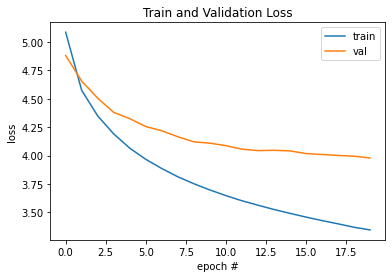

In [11]:
%%time
start_time = time.time()
encoder_blank = EncoderLSTM(
    input_size = len(mt_train_ds.source_vocab), 
    hidden_size = hidden_size, 
    padding_idx = PADDING_IDX,
    device = device,
    augmentation_type = 'blank',
    unk_idx = UNK_IDX,
    gamma = 0.10
)
model_blank, losses_blank, bleus_blank, which_blank = train(
    encoder_blank,
    mt_train_ds, mt_train_dl, 
    mt_val_ds, mt_val_dl, 
    device,
    bos_idx = BOS_IDX, eos_idx = EOS_IDX,
    path = PARENT_DIR + 'jennas_lstm_models_blank/',
    epochs = epochs, hidden_size = hidden_size,
    lr = lr, weight_decay = 1e-4,
    accum_iter = accum_iter
)
times['blank'] = time.time() - start_time

pd.DataFrame(losses_blank).plot(xlabel='epoch #', ylabel='loss', title='Train and Validation Loss')

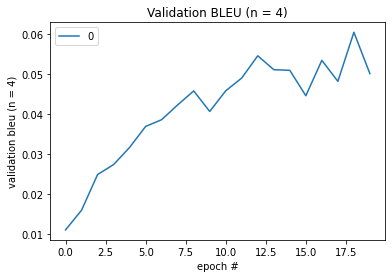

In [12]:
pd.DataFrame(bleus_blank).plot(xlabel='epoch #', ylabel='validation bleu (n = 4)', title='Validation BLEU (n = 4)')

In [ ]:
# model_blank = torch.load("/content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_lstm_models_blank/epoch18")

In [13]:
candidate_text, reference_text = translate_corpus(mt_train_ds.target_vocab, mt_test_dl, model_blank, 
                                                  eos_idx = EOS_IDX, bos_idx = BOS_IDX,
                                                  padding_idx = PADDING_IDX)
bleu_blank = bleu_score(candidate_text, reference_text)
bleu_blank

0.060338172335114945

In [14]:
bleu_blank = bleu_score(candidate_text, reference_text, max_n = 1, weights = [1])
bleu_blank

0.3635846453658543

In [15]:
with open(PARENT_DIR+'/jennas_model_blank.pickle', 'wb') as handle:
    pickle.dump(model_blank, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Baseline: Smooth

In [ ]:
def get_unigram_freq(dl, vocab_length):
  freqs = [0]*vocab_length
  total = 0
  for batch in iter(dl):
    input_seqs = batch[0]
    for seq in input_seqs:
      for token in seq:
        total += 1
        freqs[int(token)] += 1
  freqs = np.array(freqs)
  freqs = freqs/sum(freqs)
  return freqs

In [ ]:
uni = get_unigram_freq(mt_train_dl, len(mt_train_ds.source_vocab))

creating directory /content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_lstm_models_smooth/


epoch 0: training loss = 5.10878 - validation loss = 4.91203 - validation bleu = 0.01124


epoch 1: training loss = 4.58419 - validation loss = 4.64331 - validation bleu = 0.02223


epoch 2: training loss = 4.36246 - validation loss = 4.51563 - validation bleu = 0.02786


epoch 3: training loss = 4.20881 - validation loss = 4.3772 - validation bleu = 0.03091


epoch 4: training loss = 4.09125 - validation loss = 4.31603 - validation bleu = 0.03002


epoch 5: training loss = 3.99958 - validation loss = 4.22597 - validation bleu = 0.03333


epoch 6: training loss = 3.92629 - validation loss = 4.19234 - validation bleu = 0.0335


epoch 7: training loss = 3.8606 - validation loss = 4.147 - validation bleu = 0.03625


epoch 8: training loss = 3.8035 - validation loss = 4.11547 - validation bleu = 0.03519


epoch 9: training loss = 3.75197 - validation loss = 4.09205 - validation bleu = 0.03666


epoch 10: training loss = 3.70391 - validation loss = 4.06732 - validation bleu = 0.04129


epoch 11: training loss = 3.66392 - validation loss = 4.02845 - validation bleu = 0.04217


epoch 12: training loss = 3.62544 - validation loss = 4.01055 - validation bleu = 0.04985


epoch 13: training loss = 3.59141 - validation loss = 4.01208 - validation bleu = 0.04504


epoch 14: training loss = 3.55752 - validation loss = 4.00727 - validation bleu = 0.05161


epoch 15: training loss = 3.52671 - validation loss = 4.01518 - validation bleu = 0.05429


epoch 16: training loss = 3.49816 - validation loss = 3.97316 - validation bleu = 0.05563


epoch 17: training loss = 3.4709 - validation loss = 3.95401 - validation bleu = 0.05222


epoch 18: training loss = 3.44245 - validation loss = 3.94744 - validation bleu = 0.04974


epoch 19: training loss = 3.41899 - validation loss = 3.94617 - validation bleu = 0.05186
best model path: /content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_lstm_models_smooth/epoch16
CPU times: user 41min 46s, sys: 51.4 s, total: 42min 38s
Wall time: 42min 59s


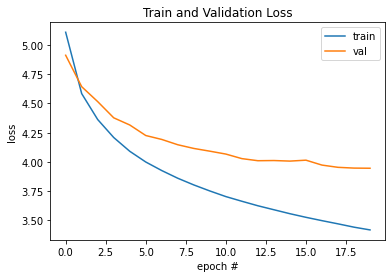

In [ ]:
%%time
start_time = time.time()
encoder_smooth = EncoderLSTM(
    input_size = len(mt_train_ds.source_vocab), 
    hidden_size = hidden_size, 
    padding_idx = PADDING_IDX,
    device = device,
    augmentation_type = 'smooth',
    unigram_freq = uni,
    gamma = 0.10
)
model_smooth, losses_smooth, bleus_smooth, which = train(
    encoder_smooth,
    mt_train_ds, mt_train_dl, 
    mt_val_ds, mt_val_dl, 
    device,
    bos_idx = BOS_IDX, eos_idx = EOS_IDX,
    path = PARENT_DIR + 'jennas_lstm_models_smooth/',
    epochs = epochs, hidden_size = hidden_size,
    lr = lr, weight_decay = 1e-4,
    accum_iter = accum_iter
)
times['smooth'] = time.time() - start_time


pd.DataFrame(losses_smooth).plot(xlabel='epoch #', ylabel='loss', title='Train and Validation Loss')

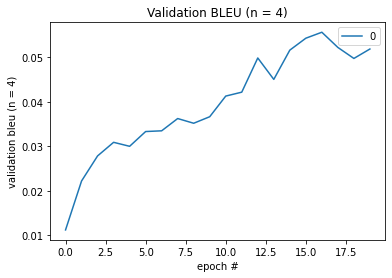

In [ ]:
pd.DataFrame(bleus_smooth).plot(xlabel='epoch #', ylabel='validation bleu (n = 4)', title='Validation BLEU (n = 4)')

In [ ]:
# model_smooth = torch.load("/content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_lstm_models_smooth/epoch16")

In [ ]:
candidate_text, reference_text = translate_corpus(mt_train_ds.target_vocab, mt_test_dl, model_smooth, 
                                                  eos_idx = EOS_IDX, bos_idx = BOS_IDX,
                                                  padding_idx = PADDING_IDX)
bleu_smooth = bleu_score(candidate_text, reference_text)
bleu_smooth

0.060982972383499146

In [ ]:
bleu_smooth = bleu_score(candidate_text, reference_text, max_n = 1, weights = [1])
bleu_smooth

0.3455905318260193

In [ ]:
with open(PARENT_DIR+'/jennas_model_smooth.pickle', 'wb') as handle:
    pickle.dump(model_smooth, handle, protocol=pickle.HIGHEST_PROTOCOL)

#Smooth POS

Note: originally forgot "which" in output of train, so the losses and bleus didn't save (though they are printed out so not terrible). I loaded the best model_lmsample directly from its stored epoch version. If there's time we could re-run but we still have all the metrics! Just no plots.

In [ ]:
# takes an hour and 10 minutes
%%time
start_time = time.time()
encoder_smooth_pos = EncoderLSTM(
    input_size = len(mt_train_ds.source_vocab), 
    hidden_size = hidden_size, 
    padding_idx = PADDING_IDX,
    device = device,
    augmentation_type = 'smooth_pos',
    unigram_freq = uni,
    source_pos_idx = mt_train_ds.source_pos_idx,
    gamma = 0.10
)
model_smooth_pos, losses_smooth_pos, bleus_smooth_pos, which = train(
    encoder_smooth_pos,
    mt_train_ds, mt_train_dl, 
    mt_val_ds, mt_val_dl, 
    device,  
    bos_idx = BOS_IDX, eos_idx = EOS_IDX,
    path = PARENT_DIR + 'jennas_lstm_models_smooth_pos/',
    epochs = epochs, hidden_size = hidden_size,
    lr = lr, weight_decay = 1e-4,
    accum_iter = accum_iter
)
times['smooth_pos'] = time.time() - start_time

creating directory /content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_lstm_models_smooth_pos/


epoch 0: training loss = 5.0918 - validation loss = 4.89782 - validation bleu = 0.00987


epoch 1: training loss = 4.57147 - validation loss = 4.64895 - validation bleu = 0.02729


epoch 2: training loss = 4.34812 - validation loss = 4.49381 - validation bleu = 0.02698


epoch 3: training loss = 4.19509 - validation loss = 4.36536 - validation bleu = 0.03323


epoch 4: training loss = 4.07555 - validation loss = 4.30142 - validation bleu = 0.03415


epoch 5: training loss = 3.98097 - validation loss = 4.24731 - validation bleu = 0.0388


epoch 6: training loss = 3.90321 - validation loss = 4.17871 - validation bleu = 0.03586


epoch 7: training loss = 3.83751 - validation loss = 4.15298 - validation bleu = 0.04366


epoch 8: training loss = 3.78425 - validation loss = 4.10718 - validation bleu = 0.03931


epoch 9: training loss = 3.73324 - validation loss = 4.08299 - validation bleu = 0.0401


epoch 10: training loss = 3.68887 - validation loss = 4.07282 - validation bleu = 0.04986


epoch 11: training loss = 3.64892 - validation loss = 4.04768 - validation bleu = 0.04122


epoch 12: training loss = 3.60962 - validation loss = 4.03996 - validation bleu = 0.05097


epoch 13: training loss = 3.57618 - validation loss = 4.01917 - validation bleu = 0.04781


epoch 14: training loss = 3.54241 - validation loss = 4.00961 - validation bleu = 0.05305


epoch 15: training loss = 3.51156 - validation loss = 3.99064 - validation bleu = 0.04535


epoch 16: training loss = 3.48115 - validation loss = 3.99248 - validation bleu = 0.0514


epoch 17: training loss = 3.45281 - validation loss = 3.98726 - validation bleu = 0.0605


epoch 18: training loss = 3.42879 - validation loss = 3.96509 - validation bleu = 0.05413


epoch 19: training loss = 3.40225 - validation loss = 3.96055 - validation bleu = 0.06089
best model path: /content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_lstm_models_smooth_pos/epoch19


ValueError: ignored

In [ ]:
# model_smooth_pos = torch.load("/content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_lstm_models_smooth_pos/epoch19")

In [ ]:
pd.DataFrame(losses_smooth_pos).plot(xlabel='epoch #', ylabel='loss', title='Train and Validation Loss')

In [ ]:
pd.DataFrame(bleus_smooth_pos).plot(xlabel='epoch #', ylabel='validation bleu (n = 4)', title='Validation BLEU (n = 4)')

In [ ]:
candidate_text, reference_text = translate_corpus(mt_train_ds.target_vocab, mt_test_dl, model_smooth_pos, 
                                                  eos_idx = EOS_IDX, bos_idx = BOS_IDX,
                                                  padding_idx = PADDING_IDX)
bleu_smooth_pos = bleu_score(candidate_text, reference_text)
bleu_smooth_pos

0.05868811160326004

In [ ]:
bleu_smooth_pos = bleu_score(candidate_text, reference_text, max_n = 1, weights = [1])
bleu_smooth_pos

0.3533882200717926

In [ ]:
with open(PARENT_DIR+'/jennas_model_smooth_pos.pickle', 'wb') as handle:
    pickle.dump(model_smooth_pos, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Baseline: LM sample
following paper

Gao cites [this paper](https://arxiv.org/pdf/1805.06201.pdf)

Notes:

- Stochastically replace words with other words that are predicted by a bi-directional language model at the word positions

- Specifically use a bi-directional LSTM-RNN Language Model. For prediction at position i, the model encodes the surrounding words individually rightward and leftward.

- In contextual augmentation, new substitutes for
word wi can be smoothly sampled from a given
probability distribution, $p(\cdot | S \ \{w_i\})$.

- Introduce temperature parameter τ and use an annealed distribution $p_{\tau}(\cdot|S - \{wi\}) \propto p(\cdot|S - \{wi\})^{1/\tau}$.
If the temperature becomes infinity, the words are sampled from a uniform distribution. If it becomes zero, the augmentation words are always words predicted with the highest probability

In [ ]:
import sys  
sys.path.insert(0, PARENT_DIR)

from load_lm import *
lm = load_lm()
lm.generate(torch.Tensor([[1,2,3]]).to(device))

tensor([[ -5.7043,  -9.4225,  -9.7102,  ...,  -7.6038, -10.0476, -10.0659]],
       device='cuda:0')

Note: originally forgot "which" in output of train, so the losses and bleus didn't save (though they are printed out so not terrible). I loaded the best model_lmsample directly from its stored epoch version. If there's time we could re-run but we still have all the metrics! Just no plots.

In [ ]:
# takse 1 hour
%%time
start_time = time.time()
encoder_lmsample = EncoderLSTM(
    input_size = len(mt_train_ds.source_vocab), 
    hidden_size = hidden_size, 
    padding_idx = PADDING_IDX,
    device = device,
    augmentation_type = 'lmsample',
    language_model = lm,
    gamma = 0.10
)

model_lmsample, losses_lmsample, bleus_lmsample, which = train(
    encoder_lmsample,
    mt_train_ds, mt_train_dl, 
    mt_val_ds, mt_val_dl, 
    device,  
    bos_idx = BOS_IDX, eos_idx = EOS_IDX,
    path = PARENT_DIR + 'jennas_lstm_models_lmsample/',
    epochs = epochs, hidden_size = hidden_size,
    lr = lr, weight_decay = 1e-4,
    accum_iter = accum_iter
)
times['lmsample'] = time.time() - start_time

creating directory /content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_lstm_models_lmsample/


epoch 0: training loss = 5.09038 - validation loss = 4.9036 - validation bleu = 0.01282


epoch 1: training loss = 4.55638 - validation loss = 4.62985 - validation bleu = 0.02533


epoch 2: training loss = 4.33013 - validation loss = 4.4919 - validation bleu = 0.02821


epoch 3: training loss = 4.17395 - validation loss = 4.37277 - validation bleu = 0.03116


epoch 4: training loss = 4.04746 - validation loss = 4.28966 - validation bleu = 0.03129


epoch 5: training loss = 3.94628 - validation loss = 4.23826 - validation bleu = 0.03385


epoch 6: training loss = 3.86359 - validation loss = 4.17492 - validation bleu = 0.04049


epoch 7: training loss = 3.79136 - validation loss = 4.14059 - validation bleu = 0.04023


epoch 8: training loss = 3.72882 - validation loss = 4.06777 - validation bleu = 0.04079


epoch 9: training loss = 3.67419 - validation loss = 4.09064 - validation bleu = 0.04607


epoch 10: training loss = 3.62574 - validation loss = 4.0629 - validation bleu = 0.04316


epoch 11: training loss = 3.57904 - validation loss = 4.0442 - validation bleu = 0.04731


epoch 12: training loss = 3.53971 - validation loss = 4.02527 - validation bleu = 0.05852


epoch 13: training loss = 3.50295 - validation loss = 4.00134 - validation bleu = 0.05339


epoch 14: training loss = 3.47106 - validation loss = 4.01209 - validation bleu = 0.06083


epoch 15: training loss = 3.43941 - validation loss = 3.9852 - validation bleu = 0.04989


epoch 16: training loss = 3.40951 - validation loss = 3.97517 - validation bleu = 0.04787


epoch 17: training loss = 3.38479 - validation loss = 3.98665 - validation bleu = 0.04083


epoch 18: training loss = 3.35921 - validation loss = 3.97841 - validation bleu = 0.06217


epoch 19: training loss = 3.33521 - validation loss = 3.95426 - validation bleu = 0.06137
best model path: /content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_lstm_models_lmsample/epoch18
CPU times: user 1h 1min 49s, sys: 1min 32s, total: 1h 3min 21s
Wall time: 1h 3min 31s


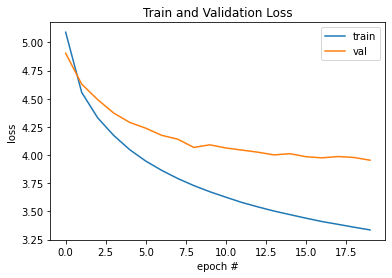

In [ ]:
pd.DataFrame(losses_lmsample).plot(xlabel='epoch #', ylabel='loss', title='Train and Validation Loss')

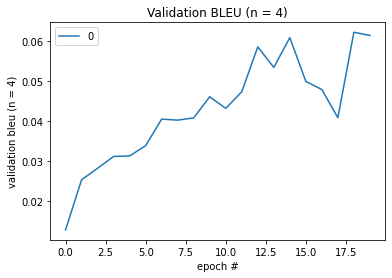

In [ ]:
pd.DataFrame(bleus_lmsample).plot(xlabel='epoch #', ylabel='validation bleu (n = 4)', title='Validation BLEU (n = 4)')

In [ ]:
# model_lmsample = torch.load("/content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_lstm_models_lmsample/epoch18")

In [ ]:
candidate_text, reference_text = translate_corpus(mt_train_ds.target_vocab, mt_test_dl, model_lmsample, 
                                                  eos_idx = EOS_IDX, bos_idx = BOS_IDX,
                                                  padding_idx = PADDING_IDX)
bleu_lmsample = bleu_score(candidate_text, reference_text)
bleu_lmsample

0.05907614901661873

In [ ]:
bleu_lmsample = bleu_score(candidate_text, reference_text, max_n = 1, weights = [1])
bleu_lmsample

0.3593699336051941

In [ ]:
with open(PARENT_DIR+'/jennas_model_lmsample.pickle', 'wb') as handle:
    pickle.dump(model_lmsample, handle, protocol=pickle.HIGHEST_PROTOCOL)

# LMSample POS

directory already exists
/content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_lstm_models_lmsample_pos/ contains []
continuing anyways... some files may be overwritten


epoch 0: training loss = 5.10092 - validation loss = 4.90451 - validation bleu = 0.00907


epoch 1: training loss = 4.60154 - validation loss = 4.66411 - validation bleu = 0.01688


epoch 2: training loss = 4.35749 - validation loss = 4.51466 - validation bleu = 0.02488


epoch 3: training loss = 4.1957 - validation loss = 4.38652 - validation bleu = 0.03111


epoch 4: training loss = 4.07018 - validation loss = 4.31957 - validation bleu = 0.02796


epoch 5: training loss = 3.97401 - validation loss = 4.25112 - validation bleu = 0.02942


epoch 6: training loss = 3.89249 - validation loss = 4.19995 - validation bleu = 0.03589


epoch 7: training loss = 3.8268 - validation loss = 4.1535 - validation bleu = 0.03434


epoch 8: training loss = 3.76453 - validation loss = 4.12425 - validation bleu = 0.03518


epoch 9: training loss = 3.71047 - validation loss = 4.0979 - validation bleu = 0.04215


epoch 10: training loss = 3.66213 - validation loss = 4.0609 - validation bleu = 0.04783


epoch 11: training loss = 3.61749 - validation loss = 4.07139 - validation bleu = 0.04345


epoch 12: training loss = 3.57538 - validation loss = 4.04528 - validation bleu = 0.04552


epoch 13: training loss = 3.53727 - validation loss = 4.05991 - validation bleu = 0.04159


epoch 14: training loss = 3.50337 - validation loss = 4.03454 - validation bleu = 0.04479


epoch 15: training loss = 3.47002 - validation loss = 3.98823 - validation bleu = 0.05229


epoch 16: training loss = 3.44245 - validation loss = 4.00419 - validation bleu = 0.05365


epoch 17: training loss = 3.41185 - validation loss = 3.97909 - validation bleu = 0.05278


epoch 18: training loss = 3.38654 - validation loss = 3.96354 - validation bleu = 0.05607


epoch 19: training loss = 3.36224 - validation loss = 3.97393 - validation bleu = 0.04521
best model path: /content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_lstm_models_lmsample_pos/epoch18
CPU times: user 1h 31min 52s, sys: 1min 40s, total: 1h 33min 33s
Wall time: 1h 33min 47s


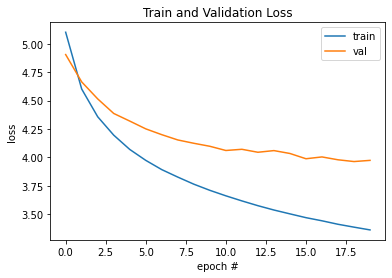

In [ ]:
%%time
start_time = time.time()
encoder_lmsample_pos = EncoderLSTM(
    input_size = len(mt_train_ds.source_vocab), 
    hidden_size = hidden_size, 
    padding_idx = PADDING_IDX,
    device = device,
    augmentation_type = 'lmsample_pos',
    language_model = lm.to('cpu'),
    source_pos_idx = mt_train_ds.source_pos_idx,
    gamma = 0.10
)

model_lmsample_pos, losses_lmsample_pos, bleus_lmsample_pos, which = train(
    encoder_lmsample_pos,
    mt_train_ds, mt_train_dl, 
    mt_val_ds, mt_val_dl, 
    device,  
    bos_idx = BOS_IDX, eos_idx = EOS_IDX,
    path = PARENT_DIR + 'jennas_lstm_models_lmsample_pos/',
    epochs = epochs, hidden_size = hidden_size,
    lr = lr, weight_decay = 1e-4,
    accum_iter = accum_iter
)

times['lmsample_pos'] = time.time() - start_time

pd.DataFrame(losses_lmsample_pos).plot(xlabel='epoch #', ylabel='loss', title='Train and Validation Loss')

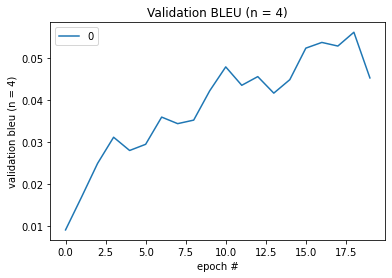

In [ ]:
pd.DataFrame(bleus_lmsample_pos).plot(xlabel='epoch #', ylabel='validation bleu (n = 4)', title='Validation BLEU (n = 4)')

In [ ]:
# model_lmsample_pos = torch.load("/content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_lstm_models_lmsample_pos/epoch18")

In [ ]:
candidate_text, reference_text = translate_corpus(mt_train_ds.target_vocab, mt_test_dl, model_lmsample_pos, 
                                                  eos_idx = EOS_IDX, bos_idx = BOS_IDX,
                                                  padding_idx = PADDING_IDX)
bleu_lmsample_pos = bleu_score(candidate_text, reference_text)
bleu_lmsample_pos

0.05357184633612633

In [ ]:
bleu_lmsample_pos = bleu_score(candidate_text, reference_text, max_n = 1, weights=[1])
bleu_lmsample_pos

0.3480314612388611

In [ ]:
with open(PARENT_DIR+'/jennas_model_lmsample_pos.pickle', 'wb') as handle:
    pickle.dump(model_lmsample_pos, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Baseline: soft


directory already exists
/content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_lstm_models_soft/ contains []
continuing anyways... some files may be overwritten


epoch 0: training loss = 5.08299 - validation loss = 4.84754 - validation bleu = 0.01176


epoch 1: training loss = 4.53899 - validation loss = 4.62782 - validation bleu = 0.02608


epoch 2: training loss = 4.31774 - validation loss = 4.44876 - validation bleu = 0.02973


epoch 3: training loss = 4.16736 - validation loss = 4.35771 - validation bleu = 0.03578


epoch 4: training loss = 4.04702 - validation loss = 4.28783 - validation bleu = 0.0351


epoch 5: training loss = 3.95017 - validation loss = 4.22187 - validation bleu = 0.0456


epoch 6: training loss = 3.87066 - validation loss = 4.15927 - validation bleu = 0.04468


epoch 7: training loss = 3.79787 - validation loss = 4.14283 - validation bleu = 0.03926


epoch 8: training loss = 3.73787 - validation loss = 4.12333 - validation bleu = 0.0508


epoch 9: training loss = 3.6827 - validation loss = 4.07158 - validation bleu = 0.04229


epoch 10: training loss = 3.63403 - validation loss = 4.04987 - validation bleu = 0.04077


epoch 11: training loss = 3.58469 - validation loss = 4.03545 - validation bleu = 0.05319


epoch 12: training loss = 3.54453 - validation loss = 4.01862 - validation bleu = 0.05205


epoch 13: training loss = 3.50657 - validation loss = 4.01185 - validation bleu = 0.05696


epoch 14: training loss = 3.46952 - validation loss = 3.97648 - validation bleu = 0.05139


epoch 15: training loss = 3.43705 - validation loss = 3.96346 - validation bleu = 0.06687


epoch 16: training loss = 3.40436 - validation loss = 3.98975 - validation bleu = 0.05264


epoch 17: training loss = 3.37397 - validation loss = 3.96368 - validation bleu = 0.06253


epoch 18: training loss = 3.34373 - validation loss = 3.93944 - validation bleu = 0.05196


epoch 19: training loss = 3.31452 - validation loss = 3.95193 - validation bleu = 0.06602
best model path: /content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_lstm_models_soft/epoch15
CPU times: user 1h 31min 50s, sys: 1h 9min 55s, total: 2h 41min 45s
Wall time: 1h 26min 1s


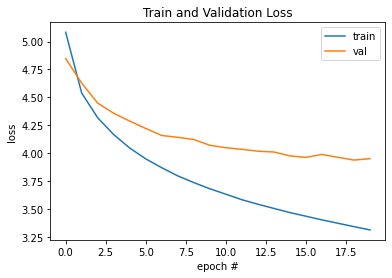

In [ ]:
%%time
start_time = time.time()
encoder_soft = EncoderLSTM(
    input_size = len(mt_train_ds.source_vocab), 
    hidden_size = hidden_size, 
    padding_idx = PADDING_IDX,
    device = device,
    augmentation_type = 'soft',
    language_model = lm,
    gamma = 0.10
)

model_soft, losses_soft, bleus_soft, which = train(
    encoder_soft,
    mt_train_ds, mt_train_dl, 
    mt_val_ds, mt_val_dl, 
    device,  
    bos_idx = BOS_IDX, eos_idx = EOS_IDX,
    path = PARENT_DIR + 'jennas_lstm_models_soft/',
    epochs = epochs, hidden_size = hidden_size,
    lr = lr, weight_decay = 1e-4,
    accum_iter = accum_iter
)
times['soft'] = time.time() - start_time

pd.DataFrame(losses_soft).plot(xlabel='epoch #', ylabel='loss', 
                              title='Train and Validation Loss')

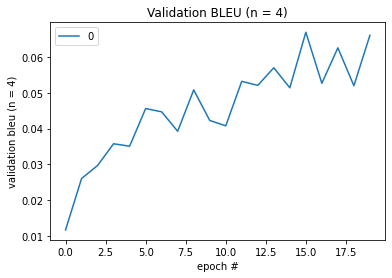

In [ ]:
pd.DataFrame(bleus_soft).plot(xlabel='epoch #', ylabel='validation bleu (n = 4)', title='Validation BLEU (n = 4)')

In [ ]:
# model_soft = torch.load("/content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_lstm_models_soft/epoch15")

In [ ]:
candidate_text, reference_text = translate_corpus(mt_train_ds.target_vocab, mt_test_dl, model_soft, 
                                                  eos_idx = EOS_IDX, bos_idx = BOS_IDX,
                                                  padding_idx = PADDING_IDX)
bleu_soft = bleu_score(candidate_text, reference_text)
bleu_soft

0.05333356931805611

In [ ]:
bleu_soft = bleu_score(candidate_text, reference_text, max_n = 1, weights = [1])
bleu_soft

0.3453192710876465

In [ ]:
with open(PARENT_DIR+'/jennas_model_soft.pickle', 'wb') as handle:
    pickle.dump(model_soft, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Soft POS

creating directory /content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_lstm_models_soft_pos/


epoch 0: training loss = 5.09319 - validation loss = 4.88905 - validation bleu = 0.01008


epoch 1: training loss = 4.5505 - validation loss = 4.6293 - validation bleu = 0.01491


epoch 2: training loss = 4.31967 - validation loss = 4.47111 - validation bleu = 0.03124


epoch 3: training loss = 4.15399 - validation loss = 4.34169 - validation bleu = 0.03392


epoch 4: training loss = 4.02573 - validation loss = 4.2464 - validation bleu = 0.03959


epoch 5: training loss = 3.92508 - validation loss = 4.18208 - validation bleu = 0.04034


epoch 6: training loss = 3.84045 - validation loss = 4.1624 - validation bleu = 0.03964


epoch 7: training loss = 3.77151 - validation loss = 4.11888 - validation bleu = 0.03775


epoch 8: training loss = 3.70993 - validation loss = 4.06485 - validation bleu = 0.04417


epoch 9: training loss = 3.65441 - validation loss = 4.05981 - validation bleu = 0.04242


epoch 10: training loss = 3.60719 - validation loss = 4.03054 - validation bleu = 0.05377


epoch 11: training loss = 3.56149 - validation loss = 4.00761 - validation bleu = 0.05061


epoch 12: training loss = 3.52151 - validation loss = 4.01929 - validation bleu = 0.05567


epoch 13: training loss = 3.48292 - validation loss = 3.98773 - validation bleu = 0.05118


epoch 14: training loss = 3.44758 - validation loss = 3.97599 - validation bleu = 0.04368


epoch 15: training loss = 3.41305 - validation loss = 3.96003 - validation bleu = 0.04956


epoch 16: training loss = 3.38156 - validation loss = 3.96392 - validation bleu = 0.05466


epoch 17: training loss = 3.35431 - validation loss = 3.95968 - validation bleu = 0.05246


epoch 18: training loss = 3.32961 - validation loss = 3.95554 - validation bleu = 0.06176


epoch 19: training loss = 3.30357 - validation loss = 3.95263 - validation bleu = 0.05558
best model path: /content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_lstm_models_soft_pos/epoch18
CPU times: user 2h 38min 51s, sys: 2h 4min 24s, total: 4h 43min 15s
Wall time: 2h 29min 45s


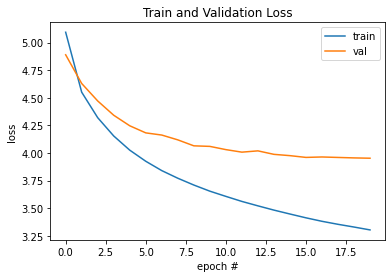

In [ ]:
# runs for 2 hours
%%time
start_time = time.time()
encoder_soft_pos = EncoderLSTM(
    input_size = len(mt_train_ds.source_vocab), 
    hidden_size = hidden_size, 
    padding_idx = PADDING_IDX,
    device = device,
    augmentation_type = 'soft_pos',
    language_model = lm,
    source_vocab_to_tags = mt_train_ds.source_vocab_to_tags,
    source_pos_idx = mt_train_ds.source_pos_idx,
    gamma = 0.10
)

model_soft_pos, losses_soft_pos, bleus_soft_pos, which = train(
    encoder_soft_pos,
    mt_train_ds, mt_train_dl, 
    mt_val_ds, mt_val_dl, 
    device,  
    bos_idx = BOS_IDX, eos_idx = EOS_IDX,
    path = PARENT_DIR + 'jennas_lstm_models_soft_pos/',
    epochs = epochs, hidden_size = hidden_size,
    lr = lr, weight_decay = 1e-4,
    accum_iter = accum_iter
)
times['soft_pos'] = time.time() - start_time

pd.DataFrame(losses_soft_pos).plot(xlabel='epoch #', ylabel='loss', 
                              title='Train and Validation Loss')

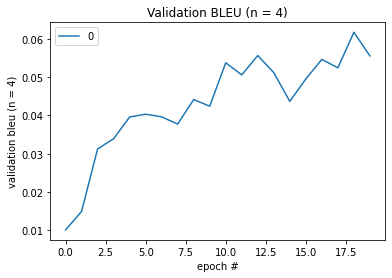

In [ ]:
pd.DataFrame(bleus_soft_pos).plot(xlabel='epoch #', ylabel='validation bleu (n = 4)', title='Validation BLEU (n = 4)')

In [ ]:
# model_soft_pos = torch.load("/content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_lstm_models_soft_pos/epoch18")

In [ ]:
candidate_text, reference_text = translate_corpus(mt_train_ds.target_vocab, mt_test_dl, model_soft_pos, 
                                                  eos_idx = EOS_IDX, bos_idx = BOS_IDX,
                                                  padding_idx = PADDING_IDX)
bleu_soft_pos = bleu_score(candidate_text, reference_text)
bleu_soft_pos

0.05463861674070358

In [ ]:
bleu_soft_pos = bleu_score(candidate_text, reference_text, max_n = 1, weights = [1])
bleu_soft_pos

0.34565213322639465

In [ ]:
with open(PARENT_DIR+'/jennas_model_soft_pos.pickle', 'wb') as handle:
    pickle.dump(model_soft_pos, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Seqmix


creating directory /content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_lstm_models_seqmix/


epoch 0: training loss = 5.12575 - validation loss = 4.85587 - validation bleu = 0.01122


epoch 1: training loss = 4.593 - validation loss = 4.58686 - validation bleu = 0.02629


epoch 2: training loss = 4.36571 - validation loss = 4.45967 - validation bleu = 0.0257


epoch 3: training loss = 4.20779 - validation loss = 4.33423 - validation bleu = 0.03073


epoch 4: training loss = 4.08349 - validation loss = 4.2597 - validation bleu = 0.03301


epoch 5: training loss = 3.98192 - validation loss = 4.17024 - validation bleu = 0.03576


epoch 6: training loss = 3.89317 - validation loss = 4.11887 - validation bleu = 0.03744


epoch 7: training loss = 3.82133 - validation loss = 4.09973 - validation bleu = 0.03856


epoch 8: training loss = 3.75646 - validation loss = 4.0652 - validation bleu = 0.03906


epoch 9: training loss = 3.6975 - validation loss = 4.0674 - validation bleu = 0.0495


epoch 10: training loss = 3.64824 - validation loss = 4.01635 - validation bleu = 0.04568


epoch 11: training loss = 3.60096 - validation loss = 4.00924 - validation bleu = 0.03978


epoch 12: training loss = 3.55703 - validation loss = 3.9849 - validation bleu = 0.05766


epoch 13: training loss = 3.51367 - validation loss = 3.98847 - validation bleu = 0.04798


epoch 14: training loss = 3.4755 - validation loss = 3.96746 - validation bleu = 0.05803


epoch 15: training loss = 3.44639 - validation loss = 3.95774 - validation bleu = 0.06087


epoch 16: training loss = 3.41354 - validation loss = 3.93554 - validation bleu = 0.05803


epoch 17: training loss = 3.38416 - validation loss = 3.94455 - validation bleu = 0.05675


epoch 18: training loss = 3.3537 - validation loss = 3.92475 - validation bleu = 0.05858


epoch 19: training loss = 3.32572 - validation loss = 3.93736 - validation bleu = 0.06128
best model path: /content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_lstm_models_seqmix/epoch19
CPU times: user 44min 16s, sys: 47.7 s, total: 45min 4s
Wall time: 45min 10s


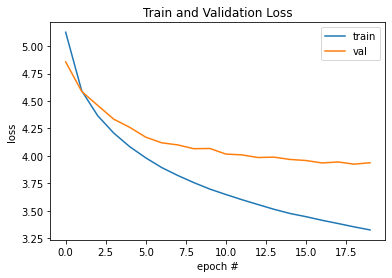

In [ ]:
 # 45 min
%%time
start_time = time.time()
encoder_seqmix = EncoderLSTM(
    input_size = len(mt_train_ds.source_vocab), 
    hidden_size = hidden_size, 
    padding_idx = PADDING_IDX,
    device = device,
    augmentation_type = 'seqmix',
    gamma = 0.10
)
model_seqmix, losses_seqmix, bleus_seqmix, which = train(
    encoder_seqmix,
    mt_train_ds, mt_train_dl, 
    mt_val_ds, mt_val_dl, 
    device,
    padding_idx = PADDING_IDX,
    augmentation_type = 'seqmix',
    eos_idx = EOS_IDX, bos_idx = BOS_IDX,
    path = PARENT_DIR + 'jennas_lstm_models_seqmix/',
    epochs = epochs, hidden_size = hidden_size,
    lr = lr, weight_decay = 1e-4,
    accum_iter = accum_iter
)

times['soft_pos'] = time.time() - start_time
pd.DataFrame(losses_seqmix).plot(xlabel='epoch #', ylabel='loss', 
                              title='Train and Validation Loss')

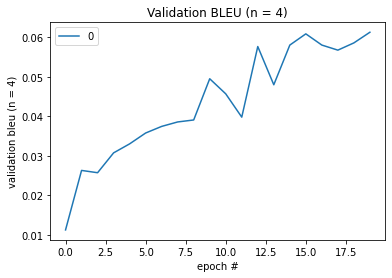

In [ ]:
pd.DataFrame(bleus_seqmix).plot(xlabel='epoch #', ylabel='validation bleu (n = 4)', title='Validation BLEU (n = 4)')

In [ ]:
# model_seqmix = torch.load("/content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_lstm_models_seqmix/epoch19")

In [ ]:
candidate_text, reference_text = translate_corpus(mt_train_ds.target_vocab, mt_test_dl, model_seqmix, 
                                                  eos_idx = EOS_IDX, bos_idx = BOS_IDX,
                                                  padding_idx = PADDING_IDX)
bleu_seqmix = bleu_score(candidate_text, reference_text)
bleu_seqmix

0.05706433579325676

In [ ]:
bleu_seqmix = bleu_score(candidate_text, reference_text, max_n = 1, weights = [1])
bleu_seqmix

0.34820592403411865

In [ ]:
with open(PARENT_DIR+'/jennas_model_seqmix.pickle', 'wb') as handle:
    pickle.dump(model_seqmix, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Seqmix wobbly

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


directory already exists
/content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_lstm_models_seqmix_wob/ contains ['epoch0', 'epoch1', 'epoch2', 'epoch3', 'epoch4', 'epoch5', 'epoch6', 'epoch7', 'epoch8', 'epoch9', 'epoch10', 'epoch11', 'epoch12', 'epoch13', 'epoch14', 'epoch15', 'epoch16', 'epoch17', 'epoch18', 'epoch19']
continuing anyways... some files may be overwritten


epoch 0: training loss = 5.31187 - validation loss = 5.04631 - validation bleu = 0.00878


epoch 1: training loss = 4.83042 - validation loss = 4.79127 - validation bleu = 0.01508


epoch 2: training loss = 4.61723 - validation loss = 4.63294 - validation bleu = 0.0277


epoch 3: training loss = 4.48032 - validation loss = 4.53848 - validation bleu = 0.0303


epoch 4: training loss = 4.37064 - validation loss = 4.43787 - validation bleu = 0.03003


epoch 5: training loss = 4.27491 - validation loss = 4.36312 - validation bleu = 0.0332


epoch 6: training loss = 4.18793 - validation loss = 4.309 - validation bleu = 0.03237


epoch 7: training loss = 4.11892 - validation loss = 4.24306 - validation bleu = 0.03856


epoch 8: training loss = 4.04863 - validation loss = 4.20962 - validation bleu = 0.04309


epoch 9: training loss = 3.98689 - validation loss = 4.18235 - validation bleu = 0.04119


epoch 10: training loss = 3.9321 - validation loss = 4.16669 - validation bleu = 0.04164


epoch 11: training loss = 3.88401 - validation loss = 4.13609 - validation bleu = 0.04875


epoch 12: training loss = 3.83912 - validation loss = 4.10868 - validation bleu = 0.04632


epoch 13: training loss = 3.79524 - validation loss = 4.10866 - validation bleu = 0.04738


epoch 14: training loss = 3.75367 - validation loss = 4.09425 - validation bleu = 0.04838


epoch 15: training loss = 3.71307 - validation loss = 4.06936 - validation bleu = 0.04937


epoch 16: training loss = 3.68048 - validation loss = 4.06293 - validation bleu = 0.05241


epoch 17: training loss = 3.64185 - validation loss = 4.05301 - validation bleu = 0.04736


epoch 18: training loss = 3.60708 - validation loss = 4.05347 - validation bleu = 0.05708


epoch 19: training loss = 3.57121 - validation loss = 4.05042 - validation bleu = 0.04893
best model path: /content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_lstm_models_seqmix_wob/epoch18
CPU times: user 44min 3s, sys: 49.9 s, total: 44min 53s
Wall time: 45min 27s


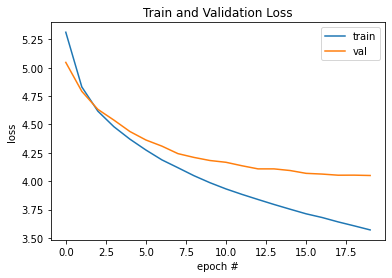

In [ ]:
%%time
start_time = time.time()

encoder_seqmix_wob = EncoderLSTM(
    input_size = len(mt_train_ds.source_vocab), 
    hidden_size = hidden_size, 
    padding_idx = PADDING_IDX,
    device = device,
    augmentation_type = 'seqmix_ind_2',
    gamma = 0.10
)

model_seqmix_wob, losses_seqmix_wob, bleus_seqmix_wob, which = train(
    encoder_seqmix_wob,
    mt_train_ds, mt_train_dl, 
    mt_val_ds, mt_val_dl, 
    device,
    padding_idx = PADDING_IDX,
    augmentation_type = 'seqmix_ind_2',
    eos_idx = EOS_IDX, bos_idx = BOS_IDX,
    path = PARENT_DIR + 'jennas_lstm_models_seqmix_wob/',
    epochs = epochs, hidden_size = hidden_size,
    lr = lr, weight_decay = 1e-4,
    accum_iter = accum_iter
)

# optionally plot your losses
pd.DataFrame(losses_seqmix_wob).plot(xlabel='epoch #', ylabel='loss', 
                              title='Train and Validation Loss')

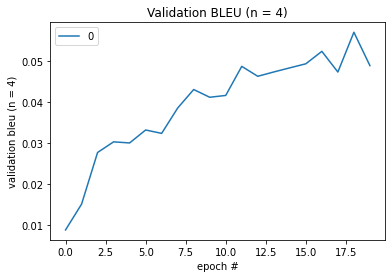

In [ ]:
pd.DataFrame(bleus_seqmix_wob).plot(xlabel='epoch #', ylabel='validation bleu (n = 4)', title='Validation BLEU (n = 4)')

In [ ]:
# model_seqmix_wob = torch.load("/content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_lstm_models_seqmix_wob/epoch14")

In [ ]:
candidate_text, reference_text = translate_corpus(mt_train_ds.target_vocab, mt_test_dl, model_seqmix_wob, 
                                                  eos_idx = EOS_IDX, bos_idx = BOS_IDX,
                                                  padding_idx = PADDING_IDX)
bleu_seqmix_wob = bleu_score(candidate_text, reference_text)
bleu_seqmix_wob

0.05815150961279869

In [ ]:
bleu_seqmix_wob = bleu_score(candidate_text, reference_text, max_n = 1, weights = [1])
bleu_seqmix_wob

0.3444511592388153

In [ ]:
with open(PARENT_DIR+'/jennas_model_seqmix_wob.pickle', 'wb') as handle:
    pickle.dump(model_seqmix_wob, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Seqmix POS-based wobbly


directory already exists
/content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_lstm_models_seqmix_pos_wob/ contains []
continuing anyways... some files may be overwritten


/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


epoch 0: training loss = 5.12442 - validation loss = 4.88599 - validation bleu = 0.01061


epoch 1: training loss = 4.67787 - validation loss = 4.65277 - validation bleu = 0.01282


epoch 2: training loss = 4.49152 - validation loss = 4.49655 - validation bleu = 0.02105


epoch 3: training loss = 4.36253 - validation loss = 4.39213 - validation bleu = 0.02744


epoch 4: training loss = 4.27172 - validation loss = 4.32765 - validation bleu = 0.02794


epoch 5: training loss = 4.20478 - validation loss = 4.24358 - validation bleu = 0.03232


epoch 6: training loss = 4.14258 - validation loss = 4.21135 - validation bleu = 0.03266


epoch 7: training loss = 4.09944 - validation loss = 4.14828 - validation bleu = 0.03787


epoch 8: training loss = 4.0532 - validation loss = 4.12257 - validation bleu = 0.03584


epoch 9: training loss = 4.01707 - validation loss = 4.08994 - validation bleu = 0.04158


epoch 10: training loss = 3.97985 - validation loss = 4.08622 - validation bleu = 0.04254


epoch 11: training loss = 3.95045 - validation loss = 4.05764 - validation bleu = 0.04017


epoch 12: training loss = 3.92146 - validation loss = 4.01996 - validation bleu = 0.04106


epoch 13: training loss = 3.90125 - validation loss = 4.00743 - validation bleu = 0.03859


epoch 14: training loss = 3.87188 - validation loss = 4.00442 - validation bleu = 0.04338


epoch 15: training loss = 3.8485 - validation loss = 3.98855 - validation bleu = 0.03978


epoch 16: training loss = 3.82881 - validation loss = 3.97812 - validation bleu = 0.04102


epoch 17: training loss = 3.80928 - validation loss = 3.98352 - validation bleu = 0.05068


epoch 18: training loss = 3.78632 - validation loss = 3.95893 - validation bleu = 0.05233


epoch 19: training loss = 3.76542 - validation loss = 3.93761 - validation bleu = 0.05293
best model path: /content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_lstm_models_seqmix_pos_wob/epoch19
CPU times: user 2h 38min 41s, sys: 2min 26s, total: 2h 41min 8s
Wall time: 2h 34min 13s


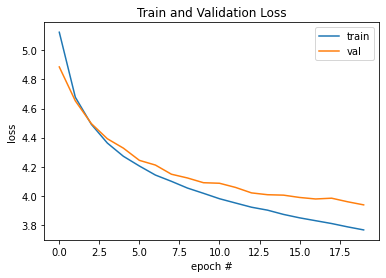

In [ ]:
%%time
start_time = time.time()

encoder_seqmix_pos_wob = EncoderLSTM(
    input_size = len(mt_train_ds.source_vocab), 
    hidden_size = hidden_size, 
    padding_idx = PADDING_IDX,
    device = device,
    augmentation_type = 'seqmix_ind_pos',
    gamma = 0.10
)

model_seqmix_pos_wob, losses_seqmix_pos_wob, bleus_seqmix_pos_wob, which = train(
    encoder_seqmix_pos_wob,
    mt_train_ds, mt_train_dl, 
    mt_val_ds, mt_val_dl, 
    device,
    padding_idx = PADDING_IDX,
    augmentation_type = 'seqmix_ind_pos',
    eos_idx = EOS_IDX, bos_idx = BOS_IDX,
    path = PARENT_DIR + 'jennas_lstm_models_seqmix_pos_wob/',
    epochs = epochs, hidden_size = hidden_size,
    lr = lr, weight_decay = 1e-4,
    accum_iter = accum_iter
)

# optionally plot your losses
pd.DataFrame(losses_seqmix_pos_wob).plot(xlabel='epoch #', ylabel='loss', 
                              title='Train and Validation Loss')

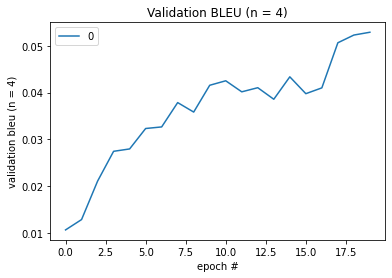

In [ ]:
pd.DataFrame(bleus_seqmix_pos_wob).plot(xlabel='epoch #', ylabel='validation bleu (n = 4)', title='Validation BLEU (n = 4)')

In [ ]:
candidate_text, reference_text = translate_corpus(mt_train_ds.target_vocab, mt_test_dl, model_seqmix_pos_wob, 
                                                  eos_idx = EOS_IDX, bos_idx = BOS_IDX,
                                                  padding_idx = PADDING_IDX)
bleu_seqmix_pos_wob = bleu_score(candidate_text, reference_text)
bleu_seqmix_pos_wob

0.05629611387848854

In [ ]:
bleu_seqmix_pos_wob = bleu_score(candidate_text, reference_text, max_n = 1, weights = [1])
bleu_seqmix_pos_wob

0.33221372961997986

In [ ]:
with open(PARENT_DIR+'/jennas_model_seqmix_pos_wob.pickle', 'wb') as handle:
    pickle.dump(model_seqmix_pos_wob, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Seqmix length matching


creating directory /content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_lstm_models_seqmix_len/


epoch 0: training loss = 5.11387 - validation loss = 4.88815 - validation bleu = 0.01341


epoch 1: training loss = 4.59524 - validation loss = 4.61116 - validation bleu = 0.01665


epoch 2: training loss = 4.37114 - validation loss = 4.4408 - validation bleu = 0.02898


epoch 3: training loss = 4.20941 - validation loss = 4.34036 - validation bleu = 0.04283


epoch 4: training loss = 4.08703 - validation loss = 4.24041 - validation bleu = 0.0339


epoch 5: training loss = 3.98341 - validation loss = 4.19132 - validation bleu = 0.03168


epoch 6: training loss = 3.89903 - validation loss = 4.15208 - validation bleu = 0.0422


epoch 7: training loss = 3.82911 - validation loss = 4.10436 - validation bleu = 0.03901


epoch 8: training loss = 3.75903 - validation loss = 4.07998 - validation bleu = 0.04257


epoch 9: training loss = 3.70226 - validation loss = 4.04182 - validation bleu = 0.045


epoch 10: training loss = 3.65966 - validation loss = 4.01752 - validation bleu = 0.05143


epoch 11: training loss = 3.60604 - validation loss = 4.01455 - validation bleu = 0.05021


epoch 12: training loss = 3.56921 - validation loss = 3.99236 - validation bleu = 0.04709


epoch 13: training loss = 3.53 - validation loss = 3.97273 - validation bleu = 0.05624


epoch 14: training loss = 3.49357 - validation loss = 3.98059 - validation bleu = 0.05069


epoch 15: training loss = 3.46336 - validation loss = 3.98756 - validation bleu = 0.05543


epoch 16: training loss = 3.4285 - validation loss = 3.96856 - validation bleu = 0.05439


epoch 17: training loss = 3.402 - validation loss = 3.99447 - validation bleu = 0.05077


epoch 18: training loss = 3.3752 - validation loss = 3.96179 - validation bleu = 0.06316


epoch 19: training loss = 3.34778 - validation loss = 3.95351 - validation bleu = 0.0521
best model path: /content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_lstm_models_seqmix_len/epoch18
CPU times: user 44min 13s, sys: 49.6 s, total: 45min 2s
Wall time: 45min 12s


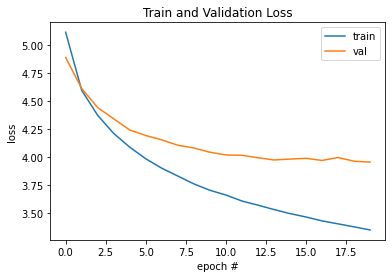

In [ ]:
%%time
start_time = time.time()

encoder_seqmix_len = EncoderLSTM(
    input_size = len(mt_train_ds.source_vocab), 
    hidden_size = hidden_size, 
    padding_idx = PADDING_IDX,
    device = device,
    augmentation_type = 'seqmix',
    gamma = 0.10
)

model_seqmix_len, losses_seqmix_len, bleus_seqmix_len, which = train(
    encoder_seqmix_len,
    mt_train_ds, mt_train_dl, 
    mt_val_ds, mt_val_dl, 
    device,
    padding_idx = PADDING_IDX,
    augmentation_type = 'seqmix_lenmatch',
    eos_idx = EOS_IDX, bos_idx = BOS_IDX,
    path = PARENT_DIR + 'jennas_lstm_models_seqmix_len/',
    epochs = epochs, hidden_size = hidden_size,
    lr = lr, weight_decay = 1e-4,
    accum_iter = accum_iter
)

# optionally plot your losses
pd.DataFrame(losses_seqmix_len).plot(xlabel='epoch #', ylabel='loss', 
                              title='Train and Validation Loss')

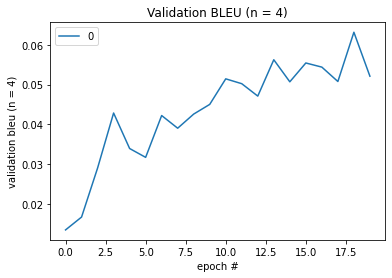

In [ ]:
pd.DataFrame(bleus_seqmix_len).plot(xlabel='epoch #', ylabel='validation bleu (n = 4)', title='Validation BLEU (n = 4)')

In [ ]:
# model_seqmix_len = torch.load("/content/gdrive/MyDrive/CS287_Research_Project/Jennas_Code/jennas_lstm_models_seqmix_len/epoch18")


In [ ]:
candidate_text, reference_text = translate_corpus(mt_train_ds.target_vocab, mt_test_dl, model_seqmix_len, 
                                                  eos_idx = EOS_IDX, bos_idx = BOS_IDX,
                                                  padding_idx = PADDING_IDX)
bleu_seqmix_len = bleu_score(candidate_text, reference_text)
bleu_seqmix_len

0.06647542119026184

In [ ]:
bleu_seqmix_len = bleu_score(candidate_text, reference_text, max_n = 1, weights = [1])
bleu_seqmix_len

0.3586404025554657

In [ ]:
with open(PARENT_DIR+'/jennas_model_seqmix_len.pickle', 'wb') as handle:
    pickle.dump(model_seqmix_len, handle, protocol=pickle.HIGHEST_PROTOCOL)